In [260]:
import pandas as pd
import numpy as np
import math
import numpy.linalg as linalg
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib inline

###### Связь доступности школьного образования и продолжительности жизни

In [276]:
data = pd.read_csv('data/Life Expectancy Data.csv')
data = data[data.Year == 2014][['Schooling', 'Life expectancy ', 'Country']].dropna()
Y = np.array(data['Life expectancy '])
X_data = np.array(data['Schooling'])

In [277]:
def get_poly(data, poly_degree):
    poly = np.zeros((data.size, poly_degree + 1))
    for col_num in range(poly_degree + 1):
        poly[:, col_num] = data**col_num
    return poly

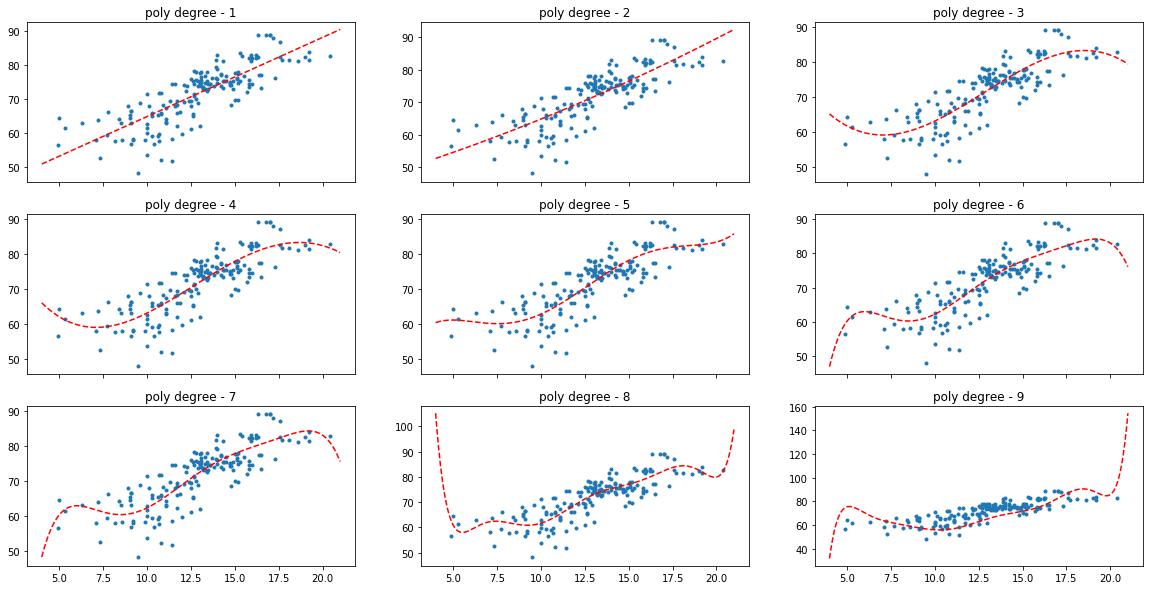

In [278]:
max_poly_degree = 9
plot_col_num = 3
plot_rows_num = int(math.ceil(max_poly_degree / plot_col_num))
_, axes = plt.subplots(plot_rows_num, plot_col_num, sharex=True, sharey=False, figsize=(20,10))
x = np.linspace(math.floor(min(X_data)), math.ceil(max(X_data)), 1000)
for poly_degree in range(1, max_poly_degree + 1, 1):
    X = get_poly(X_data, poly_degree)
    pred_koeff = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    plot_pos = (int((poly_degree - 1) / plot_col_num), (poly_degree - 1) % plot_col_num)
    axes[plot_pos].set_title('poly degree - ' + str(poly_degree))
    axes[plot_pos].plot(x, get_poly(x, poly_degree).dot(pred_koeff), 'r--')
    axes[plot_pos].scatter(X_data, Y, marker='.')

###### Выбросами можно назвать несколько стран, где образование достаточно доступно, но при этом продолжительность жизни остается маленькой (как видим полиномы большей степени стремятся подстроится под выбросы)

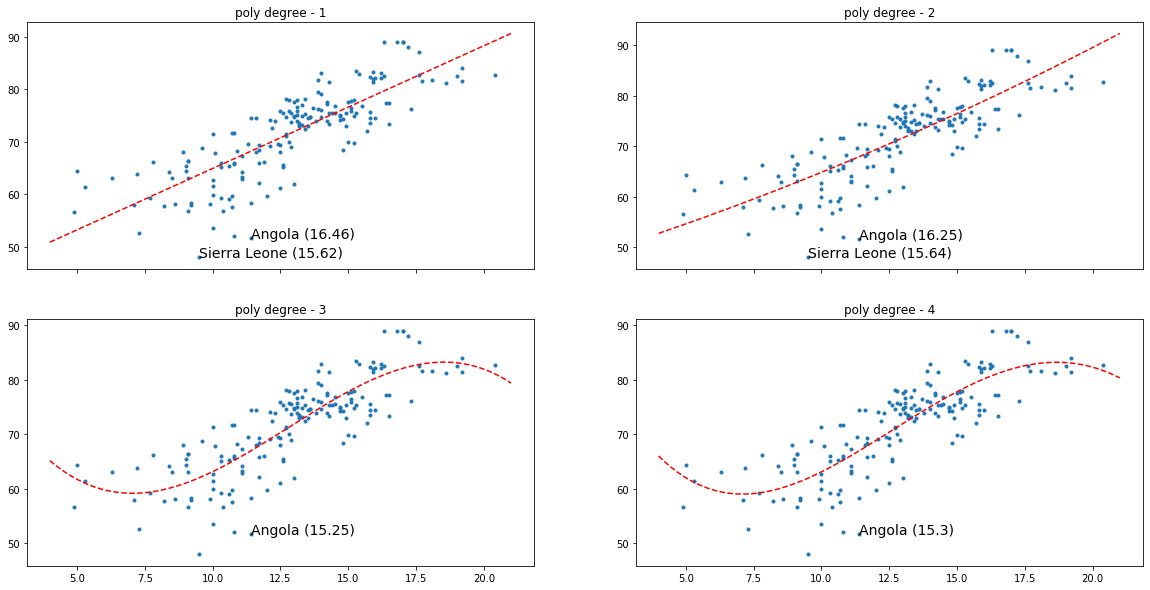

In [279]:
max_poly_degree = 4
plot_col_num = 2
plot_rows_num = int(math.ceil(max_poly_degree / plot_col_num))
_, axes = plt.subplots(plot_rows_num, plot_col_num, sharex=True, sharey=False, figsize=(20,10))
x = np.linspace(math.floor(min(X_data)), math.ceil(max(X_data)), 1000)
for poly_degree in range(1, max_poly_degree + 1, 1):
    X = get_poly(X_data, poly_degree)
    pred_koeff = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y)
    plot_pos = (int((poly_degree - 1) / plot_col_num), (poly_degree - 1) % plot_col_num)
    axes[plot_pos].set_title('poly degree - ' + str(poly_degree))
    axes[plot_pos].plot(x, get_poly(x, poly_degree).dot(pred_koeff), 'r--')
    axes[plot_pos].scatter(X_data, Y, marker='.')
    #Отметка выбросов на графике
    y = X.dot(pred_koeff)
    dist_from_poly = abs(y - Y)
    outliers = dist_from_poly > 15
    outliers_coord = list(zip(X_data[outliers], Y[outliers]))
    outliers_country = data.loc[outliers, 'Country']
    for i, country in enumerate(outliers_country):
        axes[plot_pos].annotate(
            country + ' (' + str(round(dist_from_poly[outliers][i], 2)) + ')', 
            outliers_coord[i], 
            fontsize=14
        )

###### Точность прогнозирования сильно ухудшается начиная с 9-й степени полинома (переобучение)

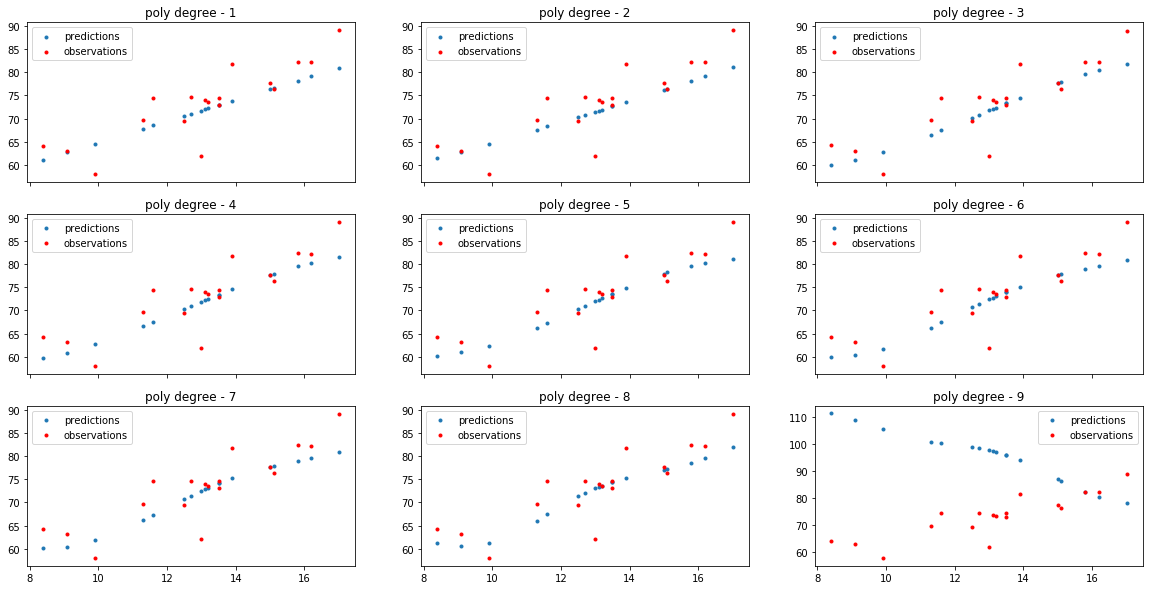

In [280]:
X_train, X_test, Y_train, Y_test = train_test_split(X_data, Y, test_size=.1)
max_poly_degree = 9
plot_col_num = 3
plot_rows_num = int(math.ceil(max_poly_degree / plot_col_num))
_, axes = plt.subplots(plot_rows_num, plot_col_num, sharex=True, sharey=False, figsize=(20,10))
x = np.linspace(math.floor(min(X_data)), math.ceil(max(X_data)), 1000)
for poly_degree in range(1, max_poly_degree + 1, 1):
    X = get_poly(X_train, poly_degree)
    pred_koeff = linalg.inv(X.T.dot(X)).dot(X.T).dot(Y_train)
    plot_pos = (int((poly_degree - 1) / plot_col_num), (poly_degree - 1) % plot_col_num)
    axes[plot_pos].set_title('poly degree - ' + str(poly_degree))
    axes[plot_pos].scatter(X_test, get_poly(X_test, poly_degree).dot(pred_koeff), marker='.')
    axes[plot_pos].scatter(X_test, Y_test, color='red', marker='.')
    axes[plot_pos].legend(['predictions', 'observations'])